In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("train.csv")

In [3]:
# Handle missing data
# Drop columns with more than 30% missing values
missing_threshold = 0.3
data.dropna(thresh=len(data) * (1 - missing_threshold), axis=1, inplace=True)

In [4]:
# Fill missing numeric values with the mean of the column
numeric_cols = data.select_dtypes(include=[np.number])
data[numeric_cols.columns] = data[numeric_cols.columns].fillna(data.mean())

<ipython-input-4-febb30d36c8e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numeric_cols.columns] = data[numeric_cols.columns].fillna(data.mean())


In [5]:
# Fill missing categorical values with a placeholder (e.g., "N/A")
categorical_cols = data.select_dtypes(exclude=[np.number])
data[categorical_cols.columns] = data[categorical_cols.columns].fillna("N/A")

In [6]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [7]:
# Feature engineering
# You can create new features or transform existing ones as needed
data["Age"] = data["YrSold"] - data["YearBuilt"]

In [8]:
# Select features and target variable
X = data.drop(["SalePrice"], axis=1)
y = data["SalePrice"]

In [9]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1164910906.47
R-squared: 0.85


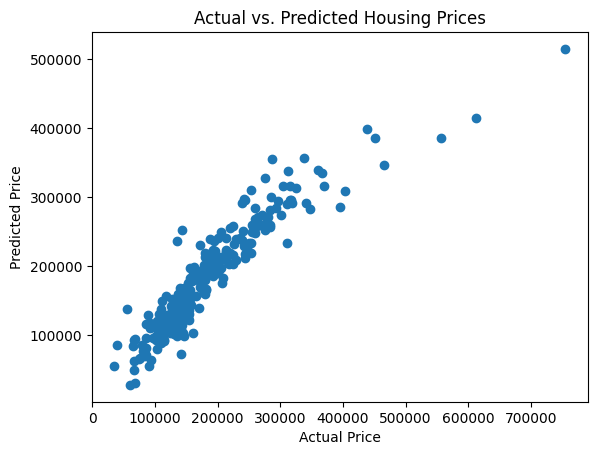

In [13]:
# Visualize the results (e.g., actual vs. predicted prices)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Housing Prices")
plt.show()